# Project: Wrangling and Analyze Data

## Table of Contents
1. Introduction
2. Gathering Data

  2.1 Gathering Twitter enhanced archive csv
  
  2.2 Gathering Image Predictions tsv
  
  2.3 Gatherng JSON txt file using Twitter APIs
  
3. Assessing the Data

  3.1 Visual Assessment
  
  3.2 Progmatic Assessment
  
4. Cleaning the Data
5. Storing
6. Visualizations

## 1. Introduction.

This Project is a component of Udacity's Nanodegree in Data Analyst. In order to produce
analysis on the tweets and the projected dog's breed, the project seeks to collect data from
the Twitter API and Udacity's given tweet data.

In [1]:
# import all  necessary  packages
import pandas as pd 
import numpy as np
import tweepy
import requests
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import json 

## 2. Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

Gathering data is the preliminary step in the data wrangling process. We will use 
a three different sources to get data for this project:

    1.A csv file , provided by Udacity, on hand with data about each tweet by WeRateDogs, 
    2.A tsv file downloaded programatically using request, which has breed predictions for each dog on WeRateDogs
    3. An additional data from Twitter  API on each tweet's retweet count and favorite ("like") count

## 2.1 Enhanced Twitter Archive

In [2]:
# load twitter_archive data to pandas dataframe
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')
twit_arch.head(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


In [3]:
# lets sample out one row using iloc
sample_7 = twit_arch.iloc[7]
sample_7

tweet_id                                                     890729181411237888
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-28 00:22:40 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          When you watch your owner call another dog a g...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/890729181...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

## 2.2 Image Predictions

In [4]:
# load the tweet prediction programmatically using requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
        
image_df = pd.read_csv('image-predictions.tsv',sep='\t')
image_df.head(8)
 
        

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False


In [5]:
# sample out a row in image predictions using iloc
sample_16 = image_df.iloc[16]
sample_16

tweet_id                                 666102155909144576
jpg_url     https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
img_num                                                   1
p1                                           English_setter
p1_conf                                            0.298617
p1_dog                                                 True
p2                                             Newfoundland
p2_conf                                            0.149842
p2_dog                                                 True
p3                                                   borzoi
p3_conf                                            0.133649
p3_dog                                                 True
Name: 16, dtype: object

## 2.3 Additional JSON data

In [6]:
# Read the JSON text file and save it as a dataframe
df_jsontweet = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_jsontweet.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })

In [7]:
# load the json file as a dataframe
add_tweets = pd.DataFrame(df_jsontweet, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
add_tweets.head(8)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848


In [8]:
# check the shape of JSON file
add_tweets.shape

(2354, 3)

## 3. Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## 3.1 Visual Assessment

In [9]:
# load sample of twitter enhanced file
twit_arch.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1194,717428917016076293,NaN,NaN,2016-04-05 19:09:17 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Skittle. He's trying to communicate. 1...,NaN,NaN,NaN,https://vine.co/v/iIhEU2lVqxz,11,10,Skittle,None,None,None,None
1846,675822767435051008,NaN,NaN,2015-12-12 23:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675822767...,10,10,None,None,None,None,None
841,766864461642756096,NaN,NaN,2016-08-20 05:08:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs... this is a ...,7.599238e+17,4.196984e+09,2016-08-01 01:28:46 +0000,https://twitter.com/dog_rates/status/759923798...,10,10,None,None,None,None,None
1961,673359818736984064,NaN,NaN,2015-12-06 04:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steve. He was just relaxing in hot tub...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673359818...,8,10,Steve,None,None,None,None
206,852672615818899456,NaN,NaN,2017-04-13 23:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. She's never tasted a stick so s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852672615...,12,10,Aspen,None,None,None,None
959,751251247299190784,NaN,NaN,2016-07-08 03:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gilbert. He's being chased by a battal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751251247...,10,10,Gilbert,None,None,None,None
1932,674024893172875264,NaN,NaN,2015-12-08 00:37:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you realize it doesn't matter how hard yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674024893...,10,10,None,None,None,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
652,792394556390137856,NaN,NaN,2016-10-29 15:55:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet BeBe. She rocks the messy bun of your dre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792394556...,12,10,BeBe,None,None,None,None
855,764857477905154048,NaN,NaN,2016-08-14 16:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aubie. He has paws for days. Nibbling ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764857477...,12,10,Aubie,None,None,None,None


* Missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,
retweeted_status_user_id, expanded_urls 
* Some dog names are "None", while some dogs are called "an" which don't make sense
* Timestamp datatype is in object form
* Columns with retweets are not needed since original tweets exist 

In [10]:
# load image predictions using .tail()
image_df.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
# load add_tweets using .sample()
add_tweets.sample(10)

,tweet_id,retweet_count,favorite_count
1697,680970795137544192,749,2665
1913,674318007229923329,570,1516
605,798340744599797760,3924,0
809,771380798096281600,5912,11746
468,816829038950027264,5496,0
1929,674036086168010753,240,906
1132,728653952833728512,1169,3620
196,854482394044301312,7608,31131
1264,709852847387627521,1336,3824
2053,671362598324076544,325,1193


## 3.2 Progmatic Assessment

In [12]:
# checking for information ummary of twitter archive file
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* timestamp data type should be datetime
* 78 in_reply_to_status_id, in_reply_to_user_id
* 181 retweeted_status_id, retweeted_status_user_id 
* 59 missing values in expanded urls
* Timestamp datatype should be datetype not object
* The dogs stages are distributed into four columns


In [13]:
# check descriptive stastistics summary
twit_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twit_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
twit_arch.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
twit_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
twit_arch.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

* Missing data or null values in the dog stages.

In [18]:
twit_arch.in_reply_to_status_id.value_counts().head(8)

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
Name: in_reply_to_status_id, dtype: int64

In [19]:
twit_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

* The source column is too long and messy

In [20]:
# checking information
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* 281 Missing values in image predictions 

In [21]:
# checking descriptive summary
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
type(twit_arch['tweet_id'][0])

numpy.int64

In [23]:
add_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
add_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## 3.3 Quality
Twitter_archive 
* Change data type for  timestamp to datetime.
* Change tweet_id data type to string
* 78 in_reply_to_status_id, in_reply_to_user_id
* 181 retweeted_status_id, retweeted_status_user_id 
* 59 missing values in expanded urls
* Remove rows in retweets and retain original tweets.
*  Some dog names are "None", while some dogs are called "an" which don't make sense
* Some tweets have "\&amp" combined with ";" , they need to be replaced with strings

Image_Prediction

* Issue of lowercase and uppercase letters in dog stages names


## 3.4 Tidiness issue
1. Create a column that contains the four dog stages (puppo, pupper, floofer and doggo) 

2. Merge additional data tweets with twitter enhanced archive

## 4. Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
twit_arch_clean = twit_arch.copy()
image_df_clean = image_df.copy()
add_tweets_clean = add_tweets.copy()


### Quality Issues

### Issue 1: Change timestamp datatype to datetime from object

#### Code

In [26]:
# changing datatype to datetime
twit_arch_clean['timestamp'] = pd.to_datetime(twit_arch_clean['timestamp'])

#### Test

In [27]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue 2: Change tweet_id datatype to string from interger

####  Code

In [28]:
twit_arch_clean['tweet_id'] = twit_arch_clean['tweet_id'].apply(str)
image_df_clean['tweet_id'] =image_df_clean['tweet_id'].apply(str)
add_tweets_clean['tweet_id'] = add_tweets_clean['tweet_id'].apply(str)

#### Test

In [29]:
print(twit_arch_clean.tweet_id.dtype)
print(image_df_clean.tweet_id.dtype)
print(add_tweets_clean.tweet_id.dtype)

object
object
object


 ### Issue 3. Remove 78 replies and 181 retweets to retain original tweets

#### Code

In [30]:
Rep_df = twit_arch_clean[pd.notnull(twit_arch_clean['in_reply_to_status_id'])].index
Ret_df = twit_arch_clean[pd.notnull(twit_arch_clean['retweeted_status_id'])].index

In [31]:
twit_arch_clean.drop(index=Rep_df, inplace=True)
twit_arch_clean.drop(index= Ret_df, inplace=True)

#### Test

In [32]:
# test if replies and retweets have been dropped
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

### Issue 4: Remove retweets and replies since they will be empty

### Code

In [33]:
twit_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [34]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [35]:
twit_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue 5: Drop mising 59 values in expanded urls

### Code

In [36]:
twit_arch_clean= twit_arch_clean[twit_arch_clean.expanded_urls.notnull()]

### Test

In [37]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


### Issue 6. Clean the text column and separate it to two columns, tweet and dog_stage

#### Code

In [38]:
dogs_cat = twit_arch_clean[['tweet_id', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator']].copy()
per_tweet = twit_arch_clean.drop(['name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [39]:
dogs_cat.columns

Index(['tweet_id', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating_numerator', 'rating_denominator'],
      dtype='object')

In [40]:
per_tweet.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls'], dtype='object')

### Issue 7: Removing rating_denominator ratings above 10

### Code

In [41]:
# load the denominator ratings
twit_arch_clean.rating_denominator.value_counts().sort_index()

2         1
7         1
10     2077
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [42]:
twit_arch_clean = twit_arch_clean[twit_arch_clean["rating_denominator"] == 10]

### Test

In [43]:
twit_arch_clean.rating_denominator.value_counts().sort_index()

10    2077
Name: rating_denominator, dtype: int64

### Issue 8: Convert dog names in dog satges p1, p2 & p3 to lowercase

### Code

In [44]:
image_df_clean['p1'] = image_df_clean['p1'].str.lower()
image_df_clean['p2'] = image_df_clean['p2'].str.lower()
image_df_clean['p3'] = image_df_clean['p3'].str.lower()

### Test

In [45]:
image_df_clean.p1.tail(3)

2072    chihuahua
2073    chihuahua
2074       orange
Name: p1, dtype: object

In [46]:
image_df_clean.p2.head(3)

0                collie
1    miniature_pinscher
2              malinois
Name: p2, dtype: object

In [47]:
image_df_clean.p3.sample(3)

704           lion
1071    eskimo_dog
1632    eskimo_dog
Name: p3, dtype: object

> Create dog_stage column to replace the four columns of dog stage puppo, pupper, floofer and doggo

### Issue 9. Clean the text column by replacing ampersand code to '&' , '\n'  and url link with space

#### Code

In [48]:
twit_arch_clean['text'] = twit_arch_clean.text.str.replace("&amp;", "&")
twit_arch_clean['text'] = twit_arch_clean.text.str.replace(r"http\S+", "")
twit_arch_clean['text'] = twit_arch_clean.text.str.strip()

#### Test

In [49]:
twit_arch_clean.query("text == '&amp;'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [50]:

twit_arch_clean.iloc[[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1426, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047, 2076], [2,3,4,5]]

,source,text,expanded_urls,rating_numerator
772,"<a href=""http://twitter.com/download/iphone"" r...",This is Huck. He's addicted to caffeine. Hope ...,https://twitter.com/dog_rates/status/776477788...,11
1013,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,https://twitter.com/dog_rates/status/747219827...,11
1074,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,https://twitter.com/dog_rates/status/739844404...,12
1173,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He just got balled on. Can't ev...,https://twitter.com/dog_rates/status/720340705...,10
1211,"<a href=""http://twitter.com/download/iphone"" r...",This is Bertson. He just wants to say hi. 11/1...,https://twitter.com/dog_rates/status/715360349...,11
1232,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,https://twitter.com/dog_rates/status/713175907...,10
1372,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",https://twitter.com/dog_rates/status/702217446...,9
1476,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is afraid of its own feet. 12/10 w...,https://twitter.com/dog_rates/status/693629975...,12
1482,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,https://vine.co/v/i5n2irFUYWv,12
1524,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,https://twitter.com/dog_rates/status/690597161...,11


### Tidiness

### Issue 1: The dog stages are put in four columns

Create dog_stage column to replace the four columns of dog stage puppo, pupper, floofer and doggo

In [51]:
# creating dog_stage column
twit_arch_clean['dog_stage'] = twit_arch_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [52]:
#drop the dog stages puppo, pupper, floofer, doggo
twit_arch_clean.drop(['doggo','floofer','pupper','puppo'],axis=1, inplace=True)

### Test

In [53]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2077 non-null object
timestamp             2077 non-null datetime64[ns]
source                2077 non-null object
text                  2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
dog_stage             346 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 162.3+ KB


### Issue 2. Merge additional data tweets with twitter enhanced archive

#### Code

In [54]:
Twitter_merge_df= twit_arch_clean.set_index('tweet_id').join(add_tweets_clean.set_index('tweet_id'), on='tweet_id', how='left')

#### Test

In [55]:
Twitter_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2077 entries, 892420643555336193 to 666020888022790149
Data columns (total 10 columns):
timestamp             2077 non-null datetime64[ns]
source                2077 non-null object
text                  2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
dog_stage             346 non-null object
retweet_count         2077 non-null int64
favorite_count        2077 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 178.5+ KB


In [56]:
Twitter_merge_df.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
tweet_id,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908
891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048


### Issue 2 part 2. Merge Twitter_merge with image predictions file

#### Code

In [57]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [58]:
master = Twitter_merge_df.join(image_df_clean.set_index('tweet_id'), on='tweet_id')

##### Test

In [59]:
master.sample(8)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
736225175608430592,2016-05-27 15:58:54,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/736225175...,10,10,very,NaN,3115,8901,...,1.0,labrador_retriever,0.399217,True,west_highland_white_terrier,0.137710,True,cocker_spaniel,0.062033,True
845397057150107648,2017-03-24 22:08:59,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,2072,8241,...,1.0,dandie_dinmont,0.394404,True,maltese_dog,0.186537,True,west_highland_white_terrier,0.181985,True
855857698524602368,2017-04-22 18:55:51,"<a href=""http://twitter.com/download/iphone"" r...","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",https://twitter.com/perfy/status/8558573181681...,13,10,None,NaN,2313,12498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749774190421639168,2016-07-04 01:17:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,NaN,1493,5114,...,1.0,pekinese,0.879012,True,chihuahua,0.054855,True,blenheim_spaniel,0.021041,True
843856843873095681,2017-03-20 16:08:44,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,https://twitter.com/dog_rates/status/843856843...,12,10,Sadie,NaN,5220,23211,...,1.0,labrador_retriever,0.922540,True,golden_retriever,0.074358,True,great_pyrenees,0.002325,True
858471635011153920,2017-04-30 00:02:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just arrived. Used paworit...,https://twitter.com/dog_rates/status/858471635...,13,10,Sophie,NaN,5271,22640,...,1.0,pembroke,0.987407,True,cardigan,0.008723,True,basenji,0.003424,True
715704790270025728,2016-04-01 00:58:13,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bentley. He gives kisses back. 11/10 p...,https://vine.co/v/ijAlDnuOD0l,11,10,Bentley,NaN,634,3055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716802964044845056,2016-04-04 01:41:58,"<a href=""http://twitter.com/download/iphone"" r...",This is Link. He struggles with couches. 10/10...,https://twitter.com/dog_rates/status/716802964...,10,10,Link,NaN,1317,4627,...,2.0,malinois,0.619577,True,leonberg,0.118089,True,bull_mastiff,0.066508,True


In [60]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2077 entries, 892420643555336193 to 666020888022790149
Data columns (total 21 columns):
timestamp             2077 non-null datetime64[ns]
source                2077 non-null object
text                  2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
dog_stage             346 non-null object
retweet_count         2077 non-null int64
favorite_count        2077 non-null int64
jpg_url               1954 non-null object
img_num               1954 non-null float64
p1                    1954 non-null object
p1_conf               1954 non-null float64
p1_dog                1954 non-null object
p2                    1954 non-null object
p2_conf               1954 non-null float64
p2_dog                1954 non-null object
p3                    1954 non-null object
p3_conf               1954 non-null float64


## 5. Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
 master.to_csv('twitter_archive_master.csv', index=False)

## 6. Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
# Read csv file to 
master = pd.read_csv('twitter_archive_master.csv')

In [63]:
master.timestamp = pd.to_datetime(Twitter_merge_df.timestamp)

In [64]:
master.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [65]:
master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2077.000000,2077.0,2077.000000,2077.000000,1954.000000,1954.000000,1.954000e+03,1.954000e+03
mean,11.699567,10.0,2845.852672,9008.549831,1.202149,0.594065,1.348960e-01,6.010819e-02
std,39.845599,0.0,4719.426395,12238.989832,0.559401,0.272336,1.011622e-01,5.080867e-02
min,0.000000,10.0,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,643.000000,2041.000000,1.000000,0.362656,5.361625e-02,1.598680e-02
50%,11.000000,10.0,1403.000000,4204.000000,1.000000,0.587440,1.175870e-01,4.947920e-02
75%,12.000000,10.0,3300.000000,11467.000000,1.000000,0.846896,1.962177e-01,9.155482e-02
max,1776.000000,10.0,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


* As can be seen above, the majority of the variables are right, excluding any instances of outliers. The rating denominator, for instance, was 10. The lowest and maximum rating denominators are remain 10 as a result, however after deleting outliers.

* The rating numerator contains outliers. The fact that the minimum value is 0 and the maximum number is 1776 makes this obvious.

In [66]:
master.corr()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
rating_numerator,1.000000,NaN,0.018578,0.016207,-0.000061,-0.009121,-0.013790,-0.004836
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.018578,NaN,1.000000,0.911268,0.106219,0.055492,-0.019305,-0.045210
favorite_count,0.016207,NaN,0.911268,1.000000,0.136315,0.079737,-0.022515,-0.053496
img_num,-0.000061,NaN,0.106219,0.136315,1.000000,0.202522,-0.157811,-0.137058
p1_conf,-0.009121,NaN,0.055492,0.079737,0.202522,1.000000,-0.509680,-0.708802
p2_conf,-0.013790,NaN,-0.019305,-0.022515,-0.157811,-0.509680,1.000000,0.478939
p3_conf,-0.004836,NaN,-0.045210,-0.053496,-0.137058,-0.708802,0.478939,1.000000


* The main dataset has a lot of outliers, as can be seen above. For instance, the rating denominator contains solely NaN values. making it challenging to draw valid findings.

* We can observe from the data above that the number of favorites and retweets are positively correlated. While p2 & p2 have a negative correlation with both the retweet and favorite count, p1 conf and favorite count also have a positive correlation.



### Insights:
1. What is the most popular dog stage

2. Which dog tweets got the least retweets

3. Which dog tweets got the highest favorite count

### Visualization

In [67]:
twit_arch_clean.dog_stage.value_counts()

pupper     234
doggo       79
puppo       29
floofer      4
Name: dog_stage, dtype: int64

Text(0.5,1,'Distribution between dog stages')

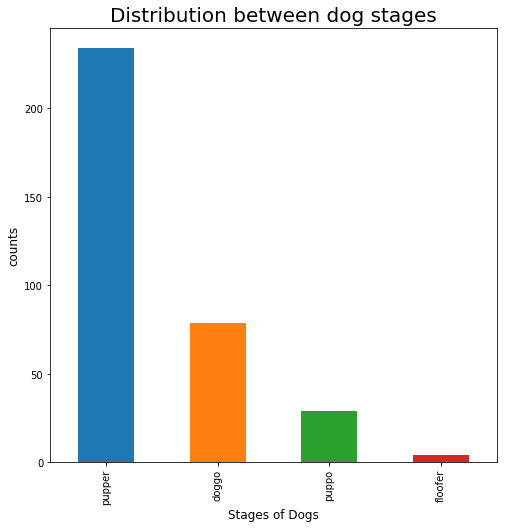

In [68]:
plt.figure(figsize=[8,8])
master.dog_stage.value_counts().sort_values(ascending=False).plot(kind ='bar')
plt.xticks(rotation=90)
plt.xlabel('Stages of Dogs', fontsize=12)
plt.ylabel('counts', fontsize=12)
plt.title('Distribution between dog stages', fontsize=20)

In [69]:
# check 10 least retweets
master.sort_values(by = 'retweet_count', ascending = True).tail(10)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1572,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,NaN,31989,67100,...,1.0,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True
115,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,32883,106827,...,2.0,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True
668,NaT,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,None,NaN,33421,55016,...,1.0,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
418,NaT,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13,10,None,NaN,37911,75639,...,2.0,arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
348,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,NaN,42228,95450,...,1.0,standard_poodle,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True
60,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,45849,107956,...,1.0,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True
324,NaT,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,48265,132810,...,1.0,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
858,NaT,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,52360,75163,...,1.0,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True
416,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,56625,107015,...,1.0,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
820,NaT,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,131075,...,1.0,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [70]:
master.sort_values(by = 'retweet_count', axis=0, ascending = True, inplace = True, na_position ='last')
master.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2060,NaT,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,NaN,16,81,...,1.0,english_setter,0.298617,True,newfoundland,0.149842,True,borzoi,0.133649,True
2041,NaT,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,NaN,23,107,...,1.0,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,labrador_retriever,0.166331,True
1010,NaT,"<a href=""http://twitter.com/download/iphone"" r...",Reminder that we made our first set of sticker...,https://twitter.com/stickergrub/status/7099191...,12,10,None,pupper,26,269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaT,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10,https://twitter.com/dog_rates/status/668291999...,10,10,None,NaN,34,264,...,1.0,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
2058,NaT,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10,10,None,NaN,37,108,...,1.0,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False


## correlation between favorite and retweet count.

In [71]:
Fav = master['favorite_count']
Ret = master['retweet_count']
correlation = Fav.corr(Ret)
print(correlation)

0.911267851111


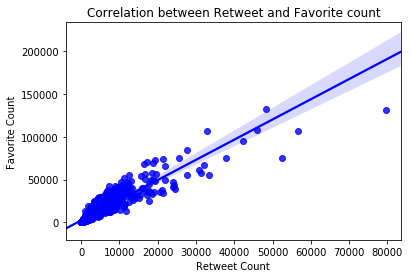

(None,)

In [72]:
sns.regplot(x= Ret, y= Fav, marker= 'o', color= 'blue')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Correlation between Retweet and Favorite count')
plt.legend
plt.show(),